<a href="https://colab.research.google.com/github/ali-workshop/Passive_Identification_of_Individuals_based_on_Ear_Shape_Analysis/blob/main/Ear_Recognition_System_A_Novel_Approach_for_Passive_Identification_of_Individuals_based_on_Ear_Shape_Analysis_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

### define the path for the data and sub_data

In [ ]:
data_path=r'/content/drive/MyDrive/ear_data/dataset2'
data_path_train=r"/content/drive/MyDrive/ear_data/dataset2/train"
data_path_test=r"/content/drive/MyDrive/ear_data/dataset2/test"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### walk through the data set

In [ ]:
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (104).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (107).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (67).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (13).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (223).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (24).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (247).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (263).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (124).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (186).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (148).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (224).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (155).jpg
/content/drive/MyDrive/ear_data/dataset2/test/001.ALI_HD/001 (226).jpg
/content/

### define helper function for preprocess images

In [ ]:
# Define function to preprocess images
def preprocess_image(img):
    # Resize image
    img = cv2.resize(img, (128, 128))
    # Convert image to float32 and normalize pixel values
    img = img.astype('float32') / 255.0
    return img


### load the train data

In [ ]:

# Load Training dataset
X = []
y = []
for subdir in os.listdir(data_path_train):
  # print(subdir)
    for file in os.listdir(os.path.join(data_path_train, subdir)):
      img = cv2.imread(os.path.join(data_path_train, subdir, file))
    # Preprocess image
      img = preprocess_image(img)
    # Add features and label to lists
      X.append(img)
      y.append(subdir)
X = np.array(X)
y = np.array(y)



#load test data

In [ ]:

# Load Testing dataset
X_test_data = []
y_test_data = []
for subdir in os.listdir(data_path_test):
  # print(subdir)
    for file in os.listdir(os.path.join(data_path_train, subdir)):
      img = cv2.imread(os.path.join(data_path_train, subdir, file))
    # Preprocess image
      img = preprocess_image(img)
    # Add features and label to lists
      X_test_data.append(img)
      y_test_data.append(subdir)
X_test_data = np.array(X_test_data)
y_test_data = np.array(y_test_data)



### split the data train and test only(validation optinal here in this case )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
num_classes = len(np.unique(y))
print(num_classes)


10


#print the shapes of the train and the test

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1412, 128, 128, 3)
(1412,)
(353, 128, 128, 3)
(353,)


### encode the y_train and y_test using dummy encoding

In [ ]:

# Convert the vector to a pandas series
series = pd.Series(y_train)

# Encode the series using get_dummies method
encoded_series = pd.get_dummies(series)
# Convert the encoded series to a numpy array
encoded_array = encoded_series.to_numpy()

# Convert the vector to a pandas series
series_val = pd.Series(y_val)
# Encode the series using get_dummies method
encoded_series_val = pd.get_dummies(series)
X_t=X_train
# Convert the encoded series to a numpy array
encoded_array_val = encoded_series_val.to_numpy()
# Convert the vector to a pandas series
series_test = pd.Series(y_test_data)

# Encode the series using get_dummies method
encoded_series_test = pd.get_dummies(series)

# Convert the encoded series to a numpy array
encoded_array_test = encoded_series_test.to_numpy()



y_train=encoded_array
y_val=encoded_array_val
y_test=encoded_array_test

### define the model and complie it

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

# Define the activation function to be used throughout the model
activation = 'sigmoid'

# Create a Sequential model
model1 = Sequential()

# Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and input shape of (128, 128, 3)
model1.add(Conv2D(32, 3, activation=activation, padding='same', input_shape=(128, 128, 3)))
model1.add(BatchNormalization())  # Batch normalization to improve training stability

# Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and He uniform kernel initializer
model1.add(Conv2D(32, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())  # MaxPooling layer to downsample the spatial dimensions

# Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and He uniform kernel initializer
model1.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())

# Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and He uniform kernel initializer
model1.add(Conv2D(64, 3, activation=activation, padding='same', kernel_initializer='he_uniform'))
X_test_data=X_t
model1.add(BatchNormalization())
model1.add(MaxPooling2D())  # MaxPooling layer to downsample the spatial dimensions

model1.add(Flatten())  # Flatten the output to feed into a Dense layer

# Dense layer with 128 neurons, 'sigmoid' activation, and He uniform kernel initializer
model1.add(Dense(128, activation=activation, kernel_initializer='he_uniform'))
X_val=X_t
model1.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons for classification

# Compile the model using 'rmsprop' optimizer, 'categorical_crossentropy' loss, and accuracy as the metric
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
print(model1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                        

### start training

In [ ]:
history=model1.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=40, batch_size=32)



Epoch 1/40
45/45 [==============================] - 247s 6s/step - loss: 2.3950 - accuracy: 0.1523 - val_loss: 2.7376 - val_accuracy: 0.1346
Epoch 2/40
45/45 [==============================] - 233s 5s/step - loss: 2.2036 - accuracy: 0.2061 - val_loss: 2.5568 - val_accuracy: 0.1324
Epoch 3/40
45/45 [==============================] - 236s 5s/step - loss: 2.1211 - accuracy: 0.2429 - val_loss: 2.2931 - val_accuracy: 0.1848
Epoch 4/40
45/45 [==============================] - 232s 5s/step - loss: 2.1172 - accuracy: 0.2521 - val_loss: 2.2363 - val_accuracy: 0.1983
Epoch 5/40
45/45 [==============================] - 234s 5s/step - loss: 2.0561 - accuracy: 0.2783 - val_loss: 2.1430 - val_accuracy: 0.2266
Epoch 6/40
45/45 [==============================] - 234s 5s/step - loss: 2.0343 - accuracy: 0.2805 - val_loss: 2.0731 - val_accuracy: 0.2592
Epoch 7/40
45/45 [==============================] - 237s 5s/step - loss: 2.0216 - accuracy: 0.2861 - val_loss: 2.0408 - val_accuracy: 0.2882
Epoch 8/40
45

#restart the project and re-train the model for 50 epochs  

In [ ]:
history=model1.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=50, batch_size=32)



Epoch 1/50
45/45 [==============================] - 12s 130ms/step - loss: 2.3907 - accuracy: 0.1657 - val_loss: 2.6306 - val_accuracy: 0.0878
Epoch 2/50
45/45 [==============================] - 3s 73ms/step - loss: 2.1693 - accuracy: 0.2132 - val_loss: 2.4436 - val_accuracy: 0.1317
Epoch 3/50
45/45 [==============================] - 3s 72ms/step - loss: 2.1443 - accuracy: 0.2238 - val_loss: 2.3458 - val_accuracy: 0.1608
Epoch 4/50
45/45 [==============================] - 3s 57ms/step - loss: 2.1102 - accuracy: 0.2493 - val_loss: 2.4773 - val_accuracy: 0.1126
Epoch 5/50
45/45 [==============================] - 3s 57ms/step - loss: 2.0840 - accuracy: 0.2585 - val_loss: 2.2776 - val_accuracy: 0.1678
Epoch 6/50
45/45 [==============================] - 3s 60ms/step - loss: 2.0730 - accuracy: 0.2712 - val_loss: 2.0729 - val_accuracy: 0.2599
Epoch 7/50
45/45 [==============================] - 3s 74ms/step - loss: 2.0421 - accuracy: 0.2755 - val_loss: 2.0769 - val_accuracy: 0.2741
Epoch 8/50


#restart the project and re-train the model for 60 epochs again

In [ ]:
history=model1.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=60, batch_size=32)

Epoch 1/60
45/45 [==============================] - 3s 77ms/step - loss: 0.5476 - accuracy: 0.8924 - val_loss: 0.6380 - val_accuracy: 0.8350
Epoch 2/60
45/45 [==============================] - 3s 61ms/step - loss: 0.3848 - accuracy: 0.9072 - val_loss: 0.4878 - val_accuracy: 0.8683
Epoch 3/60
45/45 [==============================] - 3s 61ms/step - loss: 0.3492 - accuracy: 0.9178 - val_loss: 0.5149 - val_accuracy: 0.8576
Epoch 4/60
45/45 [==============================] - 3s 75ms/step - loss: 0.3357 - accuracy: 0.9150 - val_loss: 0.4445 - val_accuracy: 0.8676
Epoch 5/60
45/45 [==============================] - 3s 63ms/step - loss: 0.2425 - accuracy: 0.9341 - val_loss: 0.1788 - val_accuracy: 0.9596
Epoch 6/60
45/45 [==============================] - 3s 62ms/step - loss: 0.2412 - accuracy: 0.9356 - val_loss: 0.3940 - val_accuracy: 0.8768
Epoch 7/60
45/45 [==============================] - 3s 61ms/step - loss: 0.1766 - accuracy: 0.9518 - val_loss: 0.8069 - val_accuracy: 0.7613
Epoch 8/60
45

#restart the project and re-train the model for 70 epochs again

In [ ]:
history=model1.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=70, batch_size=32)

Epoch 1/60
45/45 [==============================] - 3s 77ms/step - loss: 0.5476 - accuracy: 0.8924 - val_loss: 0.6380 - val_accuracy: 0.8350
Epoch 2/60
45/45 [==============================] - 3s 61ms/step - loss: 0.3848 - accuracy: 0.9072 - val_loss: 0.4878 - val_accuracy: 0.8683
Epoch 3/60
45/45 [==============================] - 3s 61ms/step - loss: 0.3492 - accuracy: 0.9178 - val_loss: 0.5149 - val_accuracy: 0.8576
Epoch 4/60
45/45 [==============================] - 3s 75ms/step - loss: 0.3357 - accuracy: 0.9150 - val_loss: 0.4445 - val_accuracy: 0.8676
Epoch 5/60
45/45 [==============================] - 3s 63ms/step - loss: 0.2425 - accuracy: 0.9341 - val_loss: 0.1788 - val_accuracy: 0.9596
Epoch 6/60
45/45 [==============================] - 3s 62ms/step - loss: 0.2412 - accuracy: 0.9356 - val_loss: 0.3940 - val_accuracy: 0.8768
Epoch 7/60
45/45 [==============================] - 3s 61ms/step - loss: 0.1766 - accuracy: 0.9518 - val_loss: 0.8069 - val_accuracy: 0.7613
Epoch 8/60
45

#restart the project and re-train the model for 80 epochs again

In [ ]:
history=model1.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=80, batch_size=32)

Epoch 1/80
45/45 [==============================] - 10s 99ms/step - loss: 2.3946 - accuracy: 0.1650 - val_loss: 2.6652 - val_accuracy: 0.0878
Epoch 2/80
45/45 [==============================] - 3s 58ms/step - loss: 2.1922 - accuracy: 0.2061 - val_loss: 2.5163 - val_accuracy: 0.1409
Epoch 3/80
45/45 [==============================] - 3s 58ms/step - loss: 2.1248 - accuracy: 0.2479 - val_loss: 2.4118 - val_accuracy: 0.1395
Epoch 4/80
45/45 [==============================] - 3s 63ms/step - loss: 2.1072 - accuracy: 0.2535 - val_loss: 2.2845 - val_accuracy: 0.1452
Epoch 5/80
45/45 [==============================] - 3s 58ms/step - loss: 2.2657 - accuracy: 0.1919 - val_loss: 2.2410 - val_accuracy: 0.1693
Epoch 6/80
45/45 [==============================] - 3s 72ms/step - loss: 2.0726 - accuracy: 0.2727 - val_loss: 2.1109 - val_accuracy: 0.2472
Epoch 7/80
45/45 [==============================] - 3s 72ms/step - loss: 2.0431 - accuracy: 0.2960 - val_loss: 2.1044 - val_accuracy: 0.2514
Epoch 8/80
4

#plot the learning curves

##the Accuracies Curves

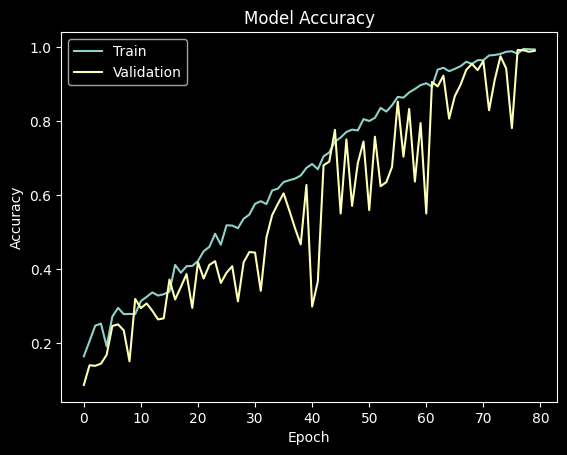

In [ ]:
# Plot training & validat?ion accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



##the Loss curves

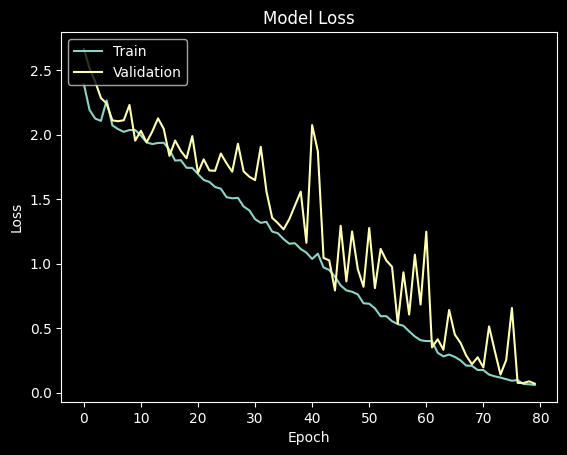

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


##print  the loss and the accuracy

In [ ]:
loss, accuracy =model1.evaluate(X_test_data, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

45/45 [==============================] - 1s 17ms/step - loss: 0.0689 - accuracy: 0.9908
Test loss: 0.06888318061828613
Test accuracy: 0.9907932281494141


#save the best model

In [ ]:
model1.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### delet model for retrain if it **need**

In [ ]:
# del model1

### تحميل المودل لاعادة استخداموload **model**

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/best_model.h5')

In [ ]:
loss, accuracy =loaded_model.evaluate(X_test_data , y_test) # you need to re_build data only if the number of samples is not compitable
print('Test loss:', loss)
print('Test accuracy:', accuracy)

45/45 [==============================] - 48s 1s/step - loss: 0.0689 - accuracy: 0.9908
Test loss: 0.06888318061828613
Test accuracy: 0.9907932281494141
